In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [27]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.grid(True)
    plt.title('Clustering of '+f1_name.upper()+' against '+f2_name.upper())
    plt.savefig(name)
    plt.show()


In [28]:
### load in the dict of dicts containing all the data on each person in the dataset
filepath = '../../MachineLearningProjects/identifyFraudFromEnronEmail/'
data_dict = pickle.load( open(filepath+'cleaned_dataset.pkl', "r") )


In [29]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2] #
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

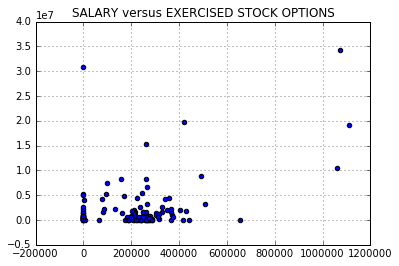

In [30]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, in finance_features:
    plt.scatter( f1, f2 )
    plt.grid(True)
    plt.title(f1_name.upper()+' against '+f2_name.upper())
plt.show()

In [20]:
y = numpy.asarray(poi)
print len(y.reshape(-1, 1))
print len(finance_features)

124
124


In [25]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, n_init=10, max_iter=300)
km.fit(finance_features)
pred = km.predict(finance_features)


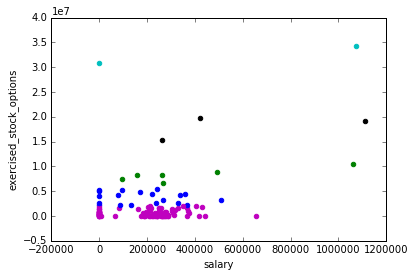

In [26]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters3.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

In [10]:
### Find min/max values to help with feature scaling

def findMinMaxFeature(feature):
    temp = []

    for key, value in data_dict.iteritems():
        if (data_dict[key][feature] != "NaN"):
            temp.append(data_dict[key][feature])
        else:
            continue

    print "{:17}${:>12,.2f}{:18}${:<12,.2f}".format('Max value of '+feature+' is ', max(temp),
                                                    '\nMin value of '+feature+' is ', min(temp))


In [11]:
findMinMaxFeature('salary')
findMinMaxFeature('exercised_stock_options')

Max value of salary is $1,111,258.00
Min value of salary is $477.00      
Max value of exercised_stock_options is $34,348,384.00
Min value of exercised_stock_options is $3,285.00    


## Feature Rescaling

In [12]:
### Min/Max rescaler

from __future__ import division

def featureScaling(arr):
    
    import numpy
    
    
    y = numpy.asarray(arr)
    min = y.min()
    max = y.max()
    for i in range(len(y)):
        arr[i] = (y[i] - min) / (max - min)

    return arr

# tests of your feature scaler--line below is input data
data = [115, 140, 175]
print featureScaling(data)


[0.0, 0.41666666666666669, 1.0]


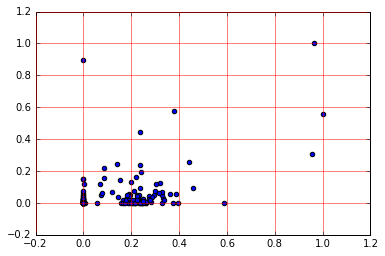

In [18]:
from sklearn.preprocessing import MinMaxScaler


feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3] #
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( scaler.fit_transform(data) )

for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
    plt.grid(color='r', linestyle='-')
plt.show()

In [19]:
findMinMaxFeature('salary')
findMinMaxFeature('exercised_stock_options')

Max value of salary is $1,111,258.00
Min value of salary is $477.00      
Max value of exercised_stock_options is $34,348,384.00
Min value of exercised_stock_options is $3,285.00    


In [22]:
### Quiz, what is the new feature of a slary of 200k, and an exercise stock option of $1M

from sklearn.preprocessing import MinMaxScaler
xSalary = numpy.array([[477.], [200000.], [1111258.00]])
xExStockOptions = numpy.array([[3285.00], [1000000.], [34348384.00]])

rescaled_xSalary = scaler.fit_transform(xSalary)
rescaled_xExStockOptions = scaler.fit_transform(xExStockOptions)

print rescaled_xSalary, rescaled_xExStockOptions

[[ 0.        ]
 [ 0.17962407]
 [ 1.        ]] [[ 0.        ]
 [ 0.02902059]
 [ 1.        ]]
